# Anggota Kelompok :
#                    - 2109106029 Maezar Abdillah
#                    - 2109106038 Diky Dwicandra
#                    - 2109106055 Wanda Nurhaliza
## Link Dataset : https://www.kaggle.com/datasets/andrewmvd/animal-faces
## Klasifikasi Gambar Wajah Hewan


### IMPORT LIBRARY

In [143]:
import os
import tensorflow as tf
import seaborn as sns
import numpy as np
import splitfolders
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from skimage import io
import random
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D

### IMPORT DATASET

- Membuat Direktori Untuk Membaca Dataset

In [2]:
input_folder = './datasets/train'

### PREPROCESSING

##### Data Split

In [3]:
train_data = "datasets/train/"
val_data = "datasets/val/"

batch_size = 32
img_height = 128
img_width = 128

##### Normalisasi

In [4]:
def augment(x):
    images = tf.image.random_flip_left_right(x, seed=None)
    return images

In [5]:
generator = ImageDataGenerator(rescale=1/255,
                               validation_split=0.2,
                              preprocessing_function=augment)



In [6]:
# Membagi dataset menjadi 2
train_dataset = generator.flow_from_directory(
    train_data,
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    subset="training",
    target_size=(img_height, img_width),
    seed=42,
    interpolation="nearest",
)

validation_dataset = generator.flow_from_directory(
    val_data,
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    subset="validation",
    target_size=(img_height, img_width),
    seed=42,
    interpolation="nearest",
)

Found 11700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


## Visualisasi Setelah Augmentasi

In [7]:
classnames = ['cat','dog','wild']

(32, 128, 128, 3)


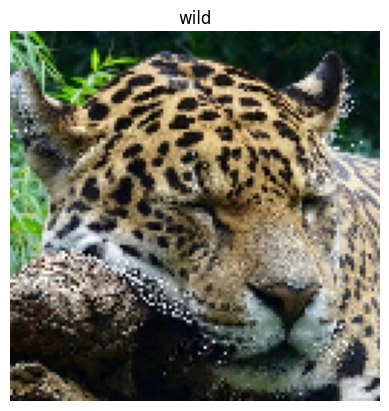

(32, 128, 128, 3)


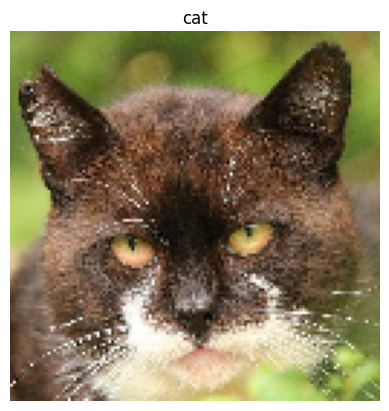

(32, 128, 128, 3)


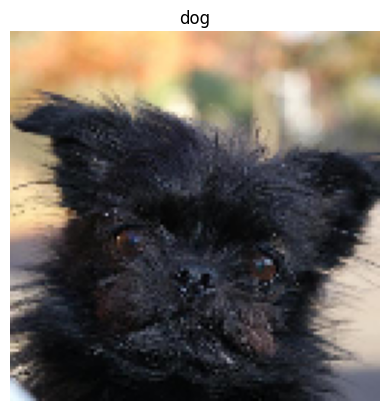

(32, 128, 128, 3)


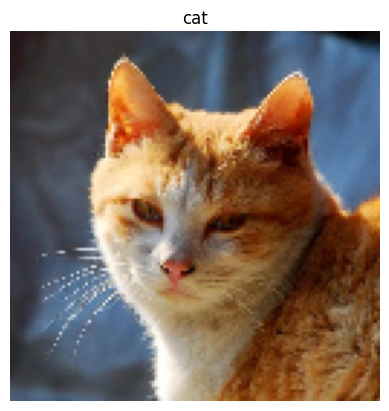

(32, 128, 128, 3)


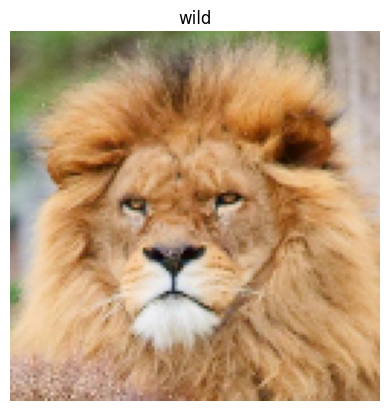

In [8]:
for _ in range(5):
    img, label = train_dataset.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.title(classnames[np.argmax(label[0])])
    plt.axis('off')
    plt.show()

In [9]:
for i, d in train_dataset:
    print(i.shape)
    print(d.shape)
    break

(32, 128, 128, 3)
(32, 3)


## Visualisasi Data

- Disini kami menggunakan Diagram Batang 
- Untuk mengetahui jumlah gambar dalam semua class

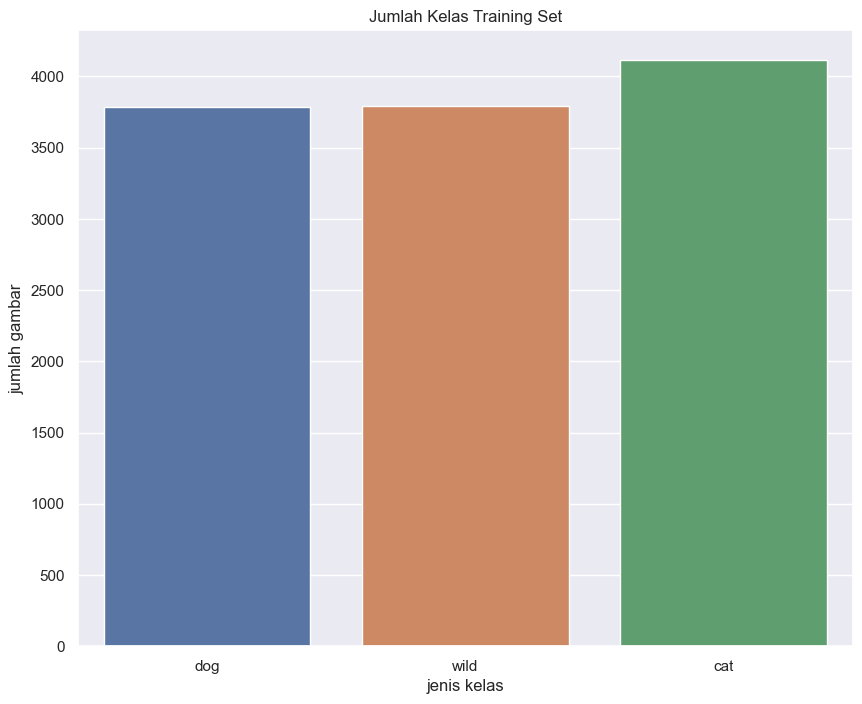

In [10]:
kelas = []

for i in range(len(train_dataset)) :
    x,y = train_dataset.next()
    for j in range(len(y)) :
        kelas.append(classnames[tf.argmax(y[j])])

plt.figure(figsize=(10, 8))

sns.set_theme()

sns.countplot(x=kelas)
plt.xlabel('jenis kelas')
plt.ylabel('jumlah gambar')
plt.title('Jumlah Kelas Training Set')
plt.show()

Dan dapat disimpulkan dari grafik diagram batang diatas kelas cat memiliki jumlah gambar yang paling banyak sedangkan kelas dog dan wild memiliki jumlah gambar yang sama

## Data Modeling

- Disini kami menggunakan model Sequential karena kami anggap cocok digunakan 
### Layer yang digunakan
- Core = (Dense)
- Convolution = (Conv2D)
- Pooling = (MaxPool2D)
- Reshaping = (Flatten)
### Activation Function
- Relu
- Softmax

In [12]:
model = Sequential()

In [13]:
# Input Layer
model.add(Conv2D(256, (3, 3), activation = 'relu', input_shape = [128, 128, 3]))

# Hidden Layer
model.add(Conv2D(128, 3, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, 3, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))

# Output Layer
model.add(Dense(3, activation = 'Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 256)     7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        1

Model Compile yang digunakan
- Optimizer = (adam)class atau metode yang digunakan untuk mengubah atribut model untuk mengurangi loss.
- Loss = (categorical_crossentropy)menghitung kuantitas yang harus diminimalkan model dalam training.
- metrics = (accuracy)untuk menentukan kriteria evaluasi model 


In [14]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

- Disini model dilatih sebanyak 5 epoch

In [15]:
hasil = model.fit(train_dataset, epochs = 5,validation_data = validation_dataset)

Epoch 1/5
366/366 [==============================] - 2253s 6s/step - loss: 0.4634 - accuracy: 0.8115 - val_loss: 0.5079 - val_accuracy: 0.7900
Epoch 2/5
366/366 [==============================] - 2253s 6s/step - loss: 0.1864 - accuracy: 0.9333 - val_loss: 0.1784 - val_accuracy: 0.9200
Epoch 3/5
366/366 [==============================] - 2247s 6s/step - loss: 0.1248 - accuracy: 0.9558 - val_loss: 0.2516 - val_accuracy: 0.8967
Epoch 4/5
366/366 [==============================] - 2238s 6s/step - loss: 0.1064 - accuracy: 0.9614 - val_loss: 0.1915 - val_accuracy: 0.9433
Epoch 5/5
366/366 [==============================] - 2248s 6s/step - loss: 0.0718 - accuracy: 0.9745 - val_loss: 0.1172 - val_accuracy: 0.9600


## Evaluasi

In [95]:
evaluasi = model.evaluate(validation_dataset)
print(f"Akurasi Validation-Set : {evaluasi[1]}")
print(f"Loss Validation-Set : {evaluasi[0]}")

10/10 [==============================] - 13s 1s/step - loss: 0.1202 - accuracy: 0.9567
Akurasi Validation-Set : 0.9566666483879089
Loss Validation-Set : 0.12024803459644318


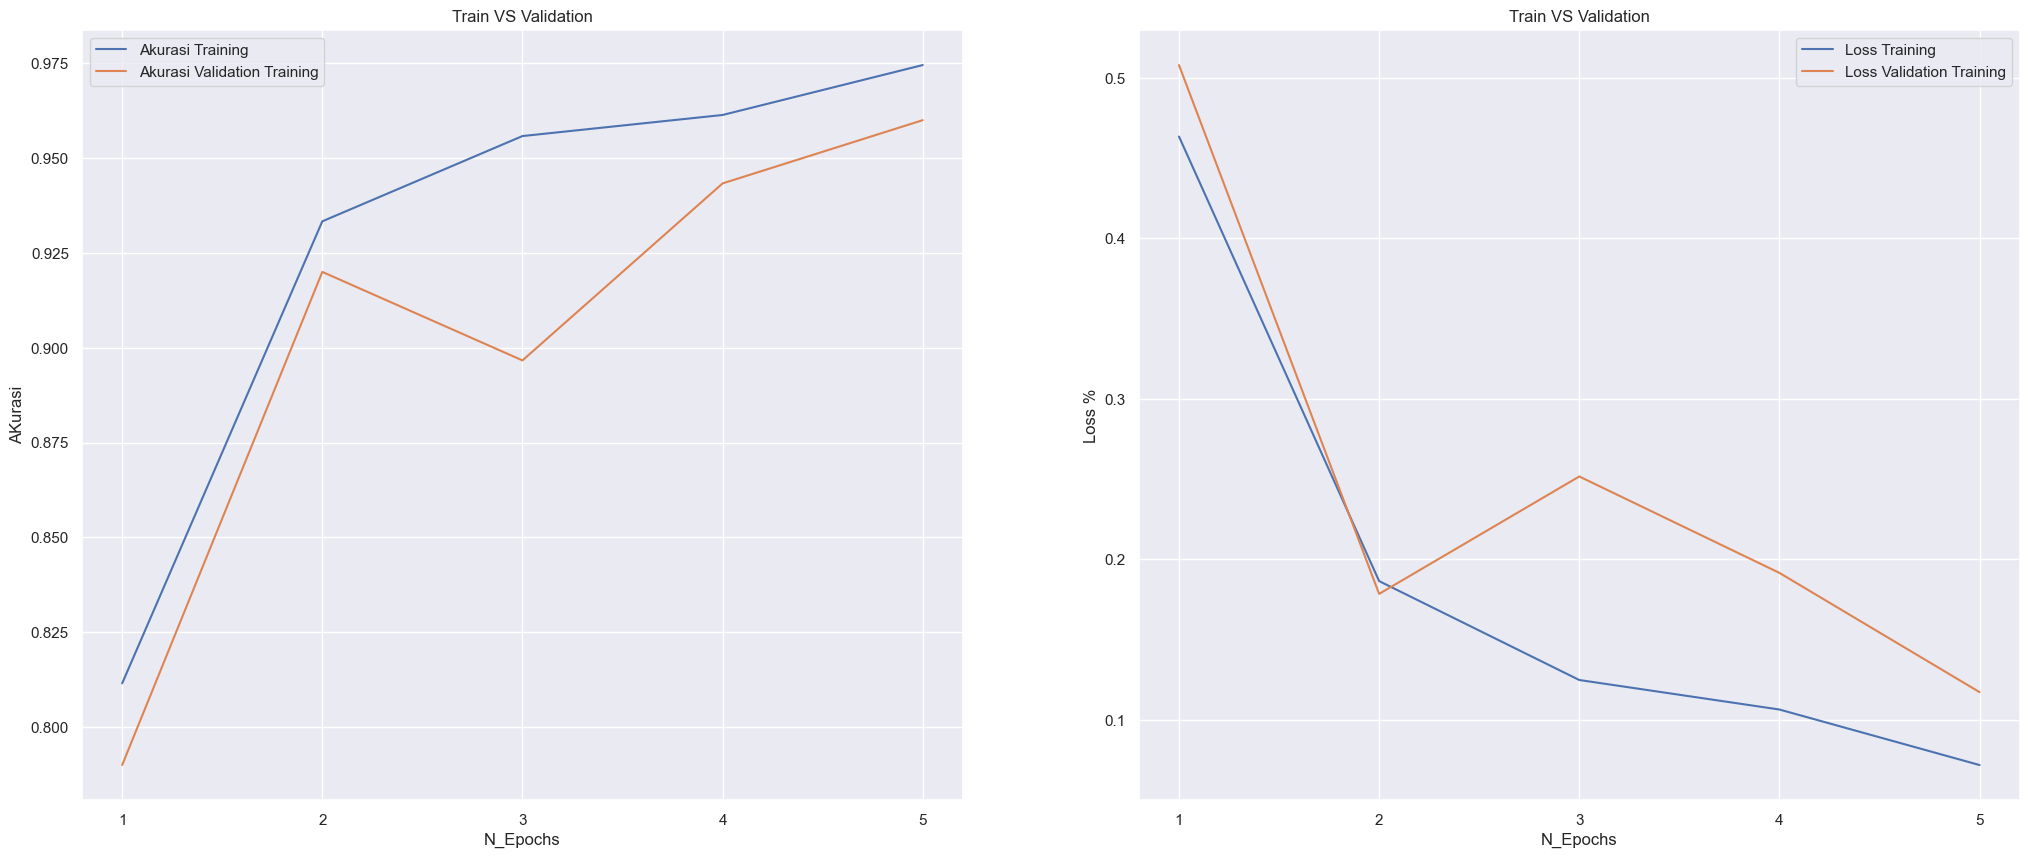

In [97]:
epochs = [i+1 for i in range(5)]

sns.set_theme()

plt.figure(figsize = (25,10))

#Subplot Akurasi

plt.subplot(1,2,1)
sns.lineplot(x = epochs, y = hasil.history['accuracy'], label = 'Akurasi Training')
sns.lineplot(x = epochs, y = hasil.history['val_accuracy'], label = 'Akurasi Validation Training')

plt.xticks(epochs)
plt.ylabel("AKurasi")
plt.xlabel("N_Epochs")
plt.title("Train VS Validation")

plt.subplot(1,2,2)
sns.lineplot(x = epochs, y = hasil.history['loss'], label = 'Loss Training')
sns.lineplot(x = epochs, y = hasil.history['val_loss'], label = 'Loss Validation Training')

plt.xticks(epochs)
plt.ylabel("Loss %")
plt.xlabel("N_Epochs")
plt.title("Train VS Validation")

plt.show()

In [104]:
score = model.evaluate(validation_dataset, verbose=1)
print(f'Test Loss    : {round(score[0] * 100,2)} %')
print(f'Test Akurasi : {round(score[1] * 100,2)} %')

10/10 [==============================] - 12s 1s/step - loss: 0.1122 - accuracy: 0.9633
Test Loss    : 11.22 %
Test Akurasi : 96.33 %


### Save Model

In [124]:
model.save('model.h5')
print('Model Saved!')


Model Saved!
